In [1]:
import sys
sys.path.append('d:/code/pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.bondprop import order
from pathlib import Path

动态链接库目录 d:\code\pywfn\pywfn\libs
当前系统:windows


In [7]:
root="D:\gfile\pywfn\键长键级关系"
datas={}
for path in Path(root).iterdir():
    try:
        if path.suffix!='.log':continue
        reader=LogReader(f'{path}')
        if not reader.normalEnd:continue
        mol=Mol(reader)
        caler=order.Calculator(mol)
        result=caler.pi_pocv()
        for a1,a2,val in result:
            a1,a2=int(a1),int(a2)
            s1=mol.atom(a1).symbol
            s2=mol.atom(a2).symbol
            if s1>s2:s1,s2=s2,s1
            if s1=='H':continue
            if s2=='H':continue
            if val==0:continue
            length=mol.bond(a1,a2).length/1.889
            # if length<1.2 and val<0.2:
            #     print(f'{a1} {a2} {length} {val}')
            # if length>1.7 and val>0.4:
            #     print(f'{a1} {a2} {length} {val}')
            key=f'{s1}-{s2}'
            if key not in datas:datas[key]=[]
            datas[key].append([a1,a2,length,val.item()])
    except:
        print(f'error {path}')

error D:\gfile\pywfn\键长键级关系\0ea8a6c88c3cb9dbcc6b1e028e05805f.log
error D:\gfile\pywfn\键长键级关系\4b94a7ebe1f0ea855b5464708fab8ad9.log


In [8]:
datas

{'C-C': [[1, 2, 1.3466392147010766, 0.9347879568190822],
  [1, 4, 1.5266871172266128, 0.0560645662379107],
  [2, 3, 1.5343288870564207, 0.06327549500821027],
  [3, 4, 1.4070224722964038, 0.5836529984989518],
  [3, 19, 1.3795171264536288, 0.6875422665564979],
  [4, 5, 1.3721580584233986, 0.7068505471988177],
  [5, 6, 1.4148476208358978, 0.5837562014277595],
  [6, 7, 1.3973570039436618, 0.6728467850566417],
  [7, 8, 1.4443869990379836, 0.4259992932461142],
  [7, 19, 1.4534213771903828, 0.4768655398945276],
  [8, 9, 1.3558506246514856, 0.8186775163326901],
  [9, 10, 1.4442225821599228, 0.4201953798931789],
  [10, 11, 1.4189435984858856, 0.5099011473028263],
  [10, 18, 1.4136337271803627, 0.6190837015477535],
  [11, 12, 1.4447155437465475, 0.4524650542303397],
  [11, 15, 1.3965692120446476, 0.6115330481201694],
  [12, 13, 1.3573705677025993, 0.8239365393825617],
  [15, 16, 1.3998730017760177, 0.5543017386309849],
  [16, 17, 1.382017721401063, 0.7227958014022089],
  [17, 18, 1.4211493519873

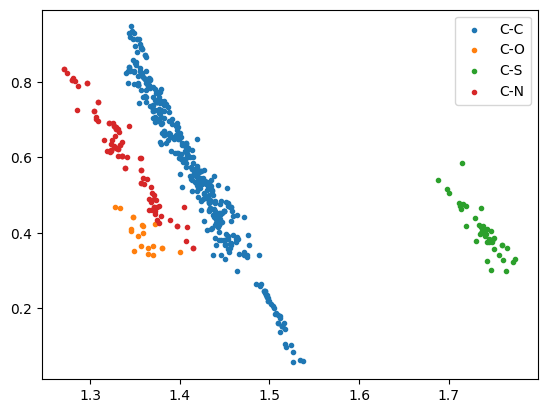

In [10]:
import numpy as np
import matplotlib.pyplot as plt
for key,data in datas.items():
    data=np.array(data)
    plt.scatter(data[:,2],data[:,3],label=key,marker='.')
plt.legend()

In [1]:
mol

NameError: name 'mol' is not defined